In [1]:
import dataset
import matplotlib.pyplot as plt
import numpy as np

In [2]:
m = 100
xs, ys =  dataset.get_beans(m)

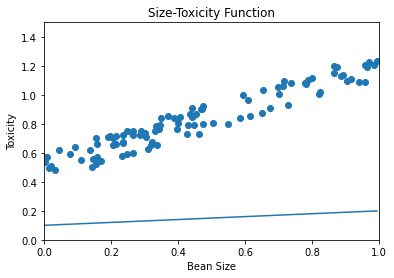

In [3]:
plt.title("Size-Toxicity Function", fontsize = 12)
plt.xlabel("Bean Size")
plt.ylabel("Toxicity")
plt.xlim(0, 1)
plt.ylim(0, 1.5)

plt.scatter(xs, ys)

w = 0.1
b = 0.1
y_pre = w*xs + b

plt.plot(xs, y_pre)
plt.show()

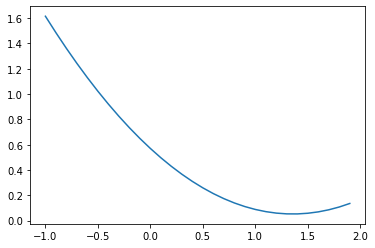

In [4]:
#绘制e-w图像(b = 0.1)
ws = np.arange(-1, 2, 0.1)
es = []

for w in ws:
    y_pre = w * xs + b
    e = np.sum((ys - y_pre)**2) * (1/m)
    es.append(e)
    
plt.plot(ws, es)
plt.show()

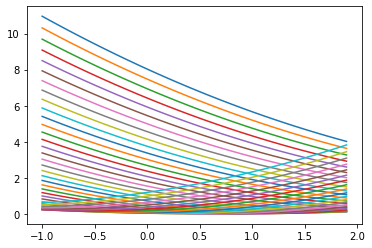

In [5]:
#绘制e-w图像(b有一定范围)
ws = np.arange(-1, 2, 0.1)
bs = np.arange(-2, 2, 0.1)

for b in bs:
    es = []
    for w in ws:
        y_pre = w * xs + b
        e = np.sum((ys - y_pre)**2) * (1/m)
        es.append(e)
    plt.plot(ws, es)
plt.show()

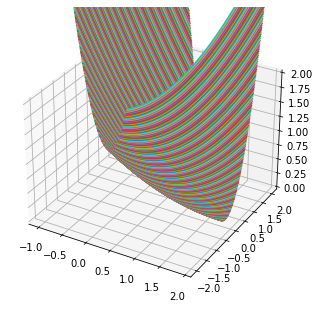

In [6]:
#绘制3D e-w图像(b有一定范围)

from mpl_toolkits.mplot3d import Axes3D

#版本问题，根据警告添加

fig = plt.figure()
ax = Axes3D(fig) 
ax.set_zlim(0, 2)

ws = np.arange(-1, 2, 0.1)
bs = np.arange(-2, 2, 0.01)

for b in bs:
    es = []
    for w in ws:
        y_pre = w * xs + b
        e = np.sum((ys - y_pre)**2) * (1/m)
        es.append(e)
    ax.plot(ws, es, b, zdir = 'y')
plt.show()

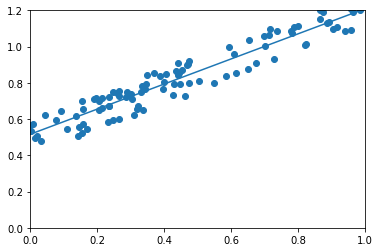

In [7]:
#梯度下降
for _ in range(500):
    for i in range(100):
        x = xs[i]
        y = ys[i]
        dw = (2*x**2) * w + 2*x*b - 2*x*y
        db = 2*b + 2*x*w - 2*y
        alpha = 0.01
        w = w - alpha*dw
        b = b - alpha*db
        
plt.clf() #清空窗口
plt.scatter(xs, ys)
y_pre = w*xs + b
plt.xlim(0, 1)
plt.ylim(0, 1.2)
plt.plot(xs, y_pre)
plt.pause(0.01)